In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import statsmodels.formula.api as smf

from matplotlib import pyplot as plt

# Import data

In [13]:
df = pd.ExcelFile('/Users/adamhockenberry/Downloads/TableS1 (4).xlsx')
meta_df = df.parse('Data', header=0)
print(meta_df.shape)
meta_df.head()

(271, 8)


,Chip n°,Chip Id,Condition key *,Condition description,Cells collected,Experiment number,Conditionn°,References
0,1,25350202,LBexp_1,Cells were grown in Luria-Bertani medium (Sigm...,O.D.600 approx. 0.5,exp. N°1,1.0,This work (Jouy)
1,2,25368302,LBexp_2,NaN,O.D.600 approx. 0.5,exp. N°2,1.0,This work (Jouy)
2,3,25348702,LBexp_3,NaN,O.D.600 approx. 0.5,exp. N°3,1.0,This work (Jouy)
3,4,25350002,LBtran_1,NaN,O.D.600 approx. 1.4,exp. N°1,2.0,This work (Jouy)
4,5,25350302,LBtran_2,NaN,O.D.600 approx. 1.4,exp. N°2,2.0,This work (Jouy)


In [14]:
meta_df = meta_df[(meta_df['Condition key *'].str.contains('exp_'))|
                          (meta_df['Condition key *'].str.contains('tran_'))|
                          (meta_df['Condition key *'].str.contains('stat_'))
                          ]
print(meta_df.shape)
meta_df.head()

(26, 8)


,Chip n°,Chip Id,Condition key *,Condition description,Cells collected,Experiment number,Conditionn°,References
0,1,25350202,LBexp_1,Cells were grown in Luria-Bertani medium (Sigm...,O.D.600 approx. 0.5,exp. N°1,1.0,This work (Jouy)
1,2,25368302,LBexp_2,NaN,O.D.600 approx. 0.5,exp. N°2,1.0,This work (Jouy)
2,3,25348702,LBexp_3,NaN,O.D.600 approx. 0.5,exp. N°3,1.0,This work (Jouy)
3,4,25350002,LBtran_1,NaN,O.D.600 approx. 1.4,exp. N°1,2.0,This work (Jouy)
4,5,25350302,LBtran_2,NaN,O.D.600 approx. 1.4,exp. N°2,2.0,This work (Jouy)


In [23]:
df = pd.ExcelFile('/Users/adamhockenberry/Downloads/TableS2 (2).xlsx')
exp_df = df.parse('Data', header=0)
print(exp_df.shape)
exp_df.head()

(5875, 281)


,Name,Locus_tag,StartV3,EndV3,StartV2,EndV2,Strand,Keeptot,Keeptrim,Id260210,...,MG-0.2_3_hyb10226602,MG+5_3_hyb20974702,MG+10_3_hyb10326302,MG+15_3_hyb24698102,MG+25_3_hyb14627102,MG+45_3_hyb14632602,MG+60_3_hyb17245002,MG+90_3_hyb14625202,MG+120_3_hyb14633902_01,MG+150_3_hyb14630502
0,S1,new_1_148,1,148,1,148,1,True,True,Id260210_1,...,7.9277,8.0555,7.4485,7.6072,7.2433,7.6942,7.9128,7.3668,7.7207,7.8191
1,S2,new_24_297_c,24,297,24,297,-1,True,True,Id260210_2,...,10.2250,9.9642,8.3683,9.9056,9.8990,9.6846,8.7974,9.4355,9.2011,9.0974
2,S3,new_150_409,150,409,150,409,1,True,True,Id260210_3,...,14.4198,14.6038,13.2696,14.8289,15.0400,15.1935,14.1689,15.0057,14.7060,14.8054
3,S4,new_299_1067_c,299,1067,299,1067,-1,True,True,Id260210_4,...,7.8362,7.7451,7.3140,7.9132,7.4491,7.6853,7.3987,7.4019,7.5042,7.8119
4,dnaA,BSU00010,410,1750,410,1750,1,True,True,-,...,13.4707,13.3288,12.9465,13.9258,13.8584,14.2102,13.4807,13.7928,13.3771,13.2473


In [28]:
good_cols = ['Locus_tag'] +\
                [col for col in exp_df if (('exp_' in col) | ('tran_' in col) | ('stat_' in col)) ]
exp_df = exp_df[good_cols]
new_col_names = ['Locus_tag'] + ['_'.join(col.split('_')[:2]) for col in good_cols[1:]]
exp_df.columns = new_col_names
exp_df = exp_df[exp_df['Locus_tag'].str[:3]=='BSU']
print(exp_df.shape)
exp_df.head()

(4292, 27)


,Locus_tag,LBexp_1,LBexp_2,LBexp_3,LBtran_1,LBtran_2,LBtran_3,LBstat_1,LBstat_2,LBstat_3,...,LBGstat_3,M9exp_1,M9exp_2,M9exp_3,M9tran_1,M9tran_2,M9tran_3,M9stat_1,M9stat_2,M9stat_3
4,BSU00010,14.3735,13.6524,13.4978,11.9048,11.8616,11.9176,12.6096,12.1886,11.8923,...,12.9061,13.8058,13.4113,13.3547,13.0112,13.1424,13.2688,10.1624,10.3575,9.9452
6,BSU00020,14.2950,13.4732,13.3349,11.5579,12.1155,12.6677,12.5014,12.4072,12.0869,...,12.3250,13.3430,12.8591,12.8240,12.3821,12.6439,12.6358,9.3508,9.5003,9.0831
7,BSU00030,14.1569,13.3851,13.1908,11.4149,11.7905,11.1620,10.8155,10.6420,10.2208,...,11.6167,13.7531,13.2609,13.0873,12.6892,12.5732,12.8504,9.7791,9.5838,9.5451
8,BSU00040,14.0873,13.8232,13.7972,12.9200,12.9320,12.8925,12.7834,12.6077,12.1702,...,12.6435,13.9198,13.4994,13.3783,12.9794,13.0822,13.3262,11.3489,11.4371,11.2711
9,BSU00050,14.1905,13.9541,13.8688,12.8681,12.8788,13.0297,12.8040,12.6077,12.0259,...,12.6431,13.9422,13.4640,13.3763,12.8665,13.0132,13.3194,11.3141,11.3469,11.1085


In [29]:
###(slowly) checking for duplicate columns
for i, col1 in enumerate(exp_df.columns):
    for col2 in exp_df.columns[i+1:]:
        assert list(exp_df[col1])!= list(exp_df[col2])

# Averaging between replicates to clean up the data

## First getting gene expression averages between replicates and creating a new `dataframe`

In [44]:
unique_conds = list(set([i.split('_')[0] for i in exp_df.columns[1:]]))
print(unique_conds)

['LBexp', 'LBtran', 'LBGstat', 'LBstat', 'M9tran', 'M9stat', 'LBGexp', 'LBGtran', 'M9exp']


In [52]:
replicate_groups = {}
for sample in unique_conds:
    try:
        replicate_groups[sample].append(meta_df[meta_df['Condition key *'].str.contains(sample)]['Condition key *'])
    except KeyError:
        replicate_groups[sample] = list(meta_df[meta_df['Condition key *'].str.contains(sample)]['Condition key *'])

for key, val in replicate_groups.items():
    print(key, val)

LBexp ['LBexp_1', 'LBexp_2', 'LBexp_3']
LBtran ['LBtran_1', 'LBtran_2', 'LBtran_3']
LBGstat ['LBGstat_1', 'LBGstat_2', 'LBGstat_3']
LBstat ['LBstat_1', 'LBstat_2', 'LBstat_3']
M9tran ['M9tran_1', 'M9tran_2', 'M9tran_3']
M9stat ['M9stat_1', 'M9stat_2', 'M9stat_3']
LBGexp ['LBGexp_1', 'LBGexp_2', 'LBGexp_3']
LBGtran ['LBGtran_2', 'LBGtran_3']
M9exp ['M9exp_1', 'M9exp_2', 'M9exp_3']


In [53]:
new_exp_df = pd.DataFrame()

for key, val in replicate_groups.items():
    new_exp_df[key] = exp_df[list(val)].mean(axis=1)
print(new_exp_df.shape)
new_exp_df.head()

(4292, 9)


,LBexp,LBtran,LBGstat,LBstat,M9tran,M9stat,LBGexp,LBGtran,M9exp
4,13.841233,11.894667,13.364733,12.230167,13.140800,10.155033,13.965100,12.92120,13.523933
6,13.701033,12.113700,12.974567,12.331833,12.553933,9.311400,13.687033,12.93900,13.008700
7,13.577600,11.455800,11.863300,10.559433,12.704267,9.636000,13.841400,12.23035,13.367100
8,13.902567,12.914833,12.942933,12.520433,13.129267,11.352367,13.932167,13.41905,13.599167
9,14.004467,12.925533,12.902967,12.479200,13.066367,11.256500,13.973367,13.36720,13.594167


## Average the growth rates across these replicates in the metadata as well

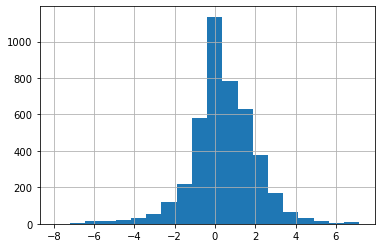

In [65]:
(new_exp_df['LBexp']-new_exp_df['LBstat']).hist(bins=20)

In [87]:
always_positive = []
for media in ['LB', 'LBG', 'M9']:
    a = new_exp_df['{}exp'.format(media)]-new_exp_df['{}tran'.format(media)]
    b = new_exp_df['{}tran'.format(media)]-new_exp_df['{}stat'.format(media)]
    c = pd.DataFrame(zip(a,b))
    always_positive.append(c.min(axis=1))

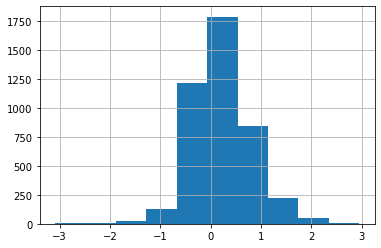

In [96]:
ugh_df = pd.DataFrame(zip(always_positive[0], always_positive[1], always_positive[2]))
ugh_df.max(axis=1).hist()

In [71]:
b

4       2.985767
6       3.242533
7       3.068267
8       1.776900
9       1.809867
          ...   
5864    2.260400
5867    2.702667
5868    2.928633
5870    3.343567
5872    2.562567
Length: 4292, dtype: float64

In [29]:
meta_df['Doubling_time'] = np.log(2)/meta_df['dilution rate (/h)']
meta_df['Growth Rate (1/hr)'] = meta_df['dilution rate (/h)']
assert list(meta_df['Simple_sample_id']) == list(new_exp_df.columns)

# Construct a third `dataframe` containing expression data summary stats

In [30]:
exp_summary_df = new_exp_df.apply(pd.DataFrame.describe, axis=1)

In [31]:
col_listy = []
for col in exp_summary_df.columns:
    if '%' not in col:
        col_listy.append(col)
    else:
        col_listy.append(col.replace('%', '_percentile'))
print(col_listy)
exp_summary_df.columns = col_listy

['count', 'mean', 'std', 'min', '25_percentile', '50_percentile', '75_percentile', 'max']


In [32]:
exp_summary_df['cv'] = exp_summary_df['std']/exp_summary_df['mean']
exp_summary_df['noise'] = exp_summary_df['std'].pow(2)/exp_summary_df['mean'].pow(2)

In [33]:
slopes = []
pearsons = []
spearmans = []
for gene in exp_summary_df.index:
    a, b, c, d, e = stats.linregress(new_exp_df.loc[gene], meta_df['dilution rate (/h)']) 
    slopes.append(a)
    pearsons.append(c)
    rho, p = stats.spearmanr(new_exp_df.loc[gene], meta_df['dilution rate (/h)'], nan_policy='omit')
    spearmans.append(rho)
    
exp_summary_df['lin_slope'] = slopes
exp_summary_df['lin_r'] = pearsons
exp_summary_df['spearmans_rho'] = spearmans

# Save some files

In [34]:
print(new_exp_df.shape)
print(meta_df.shape)
print(exp_summary_df.shape)
new_exp_df.to_csv('../Data/processed_data/processed_expression_scer_{}.tsv'.format(data_to_analyze), sep='\t')
meta_df.to_csv('../Data/processed_data/processed_metadata_scer_{}.tsv'.format(data_to_analyze), sep='\t')
exp_summary_df.to_csv('../Data/processed_data/processed_expression_summary_scer_{}.tsv'.format(data_to_analyze), sep='\t')

(3127, 14)
(14, 14)
(3127, 13)


# Get a thinned down set as a robustness check

Since conditions are correlated with one another, I'm constructing a more sparsely populated dataset where inter-condition correlations are minimized using a greedy algorithm. 

The algorithm works as follows:
1. Find which two conditions are the most highly correlated across the entire all-to-all correlation matrix
2. Randomly delete one of the two conditions in question
3. Iterate to (1)
4. Stop after reaching a pre-defined final dataset size

In [ ]:
import random

In [ ]:
cond_corr_mat = new_exp_df.corr(method='spearman')
cond_corr_mat.head()

In [ ]:
final_data_size = 30
n_to_prune = cond_corr_mat.shape[1] - final_data_size

In [ ]:
np.fill_diagonal(cond_corr_mat.values, np.nan)
to_prune = []
for i in range(n_to_prune):
    tempy = cond_corr_mat.loc[[i for i in cond_corr_mat.columns if i not in to_prune]][[i for i in cond_corr_mat.columns if i not in to_prune]].max()
    to_prune.append(random.choice([tempy.sort_values(ascending=False).index[0],\
                                   tempy.sort_values(ascending=False).index[1]]))
np.fill_diagonal(cond_corr_mat.values, 1.)

In [ ]:
to_keep = [i for i in cond_corr_mat.columns if i not in to_prune]
new_exp_df = new_exp_df[to_keep]
meta_df = meta_df[meta_df['Simple_sample_id'].isin(to_keep)]

In [ ]:
exp_summary_df = new_exp_df.apply(pd.DataFrame.describe, axis=1)
col_listy = []
for col in exp_summary_df.columns:
    if '%' not in col:
        col_listy.append(col)
    else:
        col_listy.append(col.replace('%', '_percentile'))
print(col_listy)
exp_summary_df.columns = col_listy

exp_summary_df['cv'] = exp_summary_df['std']/exp_summary_df['mean']
exp_summary_df['noise'] = exp_summary_df['std'].pow(2)/exp_summary_df['mean'].pow(2)

slopes = []
pearsons = []
spearmans = []
for gene in exp_summary_df.index:
    a, b, c, d, e = stats.linregress(new_exp_df.loc[gene], meta_df['Growth Rate (1/hr)'])
    slopes.append(a)
    pearsons.append(c)
    rho, p = stats.spearmanr(new_exp_df.loc[gene], meta_df['Growth Rate (1/hr)'])
    spearmans.append(rho)
    
exp_summary_df['lin_slope'] = slopes
exp_summary_df['lin_r'] = pearsons
exp_summary_df['spearmans_rho'] = spearmans

In [ ]:
print(new_exp_df.shape)
print(meta_df.shape)
print(exp_summary_df.shape)
new_exp_df.to_csv('../Data/processed_data/processed_expression_SPARSE.tsv', sep='\t')
meta_df.to_csv('../Data/processed_data/processed_metadata_SPARSE.tsv', sep='\t')
exp_summary_df.to_csv('../Data/processed_data/processed_expression_summary_SPARSE.tsv', sep='\t')

# Scratch